# Loss Function of Logistic Regression

When we optimize, we need an objective function to minimize. In logistic regression, we don't use the Frobenius norm like
we do in least squares. Why?

Frobenius norm

\begin{gather}
\phi(\beta)=\Vert \textbf{X}\beta - \textbf{Y} \Vert^2_F
\end{gather}

Cross entropy

\begin{gather}
E(\beta)=-\frac{1}{n}\text{tr}\left(\textbf{Y}\log \left(\exp(\textbf{S})\text{diag}\left(\frac{1}{\textbf{e}^\top\exp(\textbf{S})}\right)\right)^\top\right)
\end{gather}

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def softmax(X):
    return np.exp(X) / (1 + np.exp(X))

In [65]:
n_f = 2
n = 100

B_true = np.random.uniform(0, 7, size=2)
Xtrain = np.random.uniform(-2, 2, (n, n_f))
Ytrain = softmax(Xtrain @ B_true)

In [66]:
def objective_lstsq(B):
    A = np.array([B[0], B[1]])
    return np.linalg.norm(softmax(Xtrain @ A) - Ytrain)

In [67]:
def objective_CE(B):
    A = np.array([B[0], B[1]])
    return -1/n * np.trace(np.outer(Ytrain, np.log(softmax(Xtrain @ A))))

In [68]:
# Model Preds grid
xmin=-10; xmax=20
ymin=-10; ymax=20
x = np.arange(xmin, xmax,.5)
y = np.arange(ymin, ymax,.5)[::-1]
X, Y = np.meshgrid(x,y)
Z = np.stack((X, Y), axis=0)

In [69]:
outputLSTSQ = np.apply_along_axis(objective_lstsq, axis=0, arr=Z)
outputCE = np.apply_along_axis(objective_CE, axis=0, arr=Z)

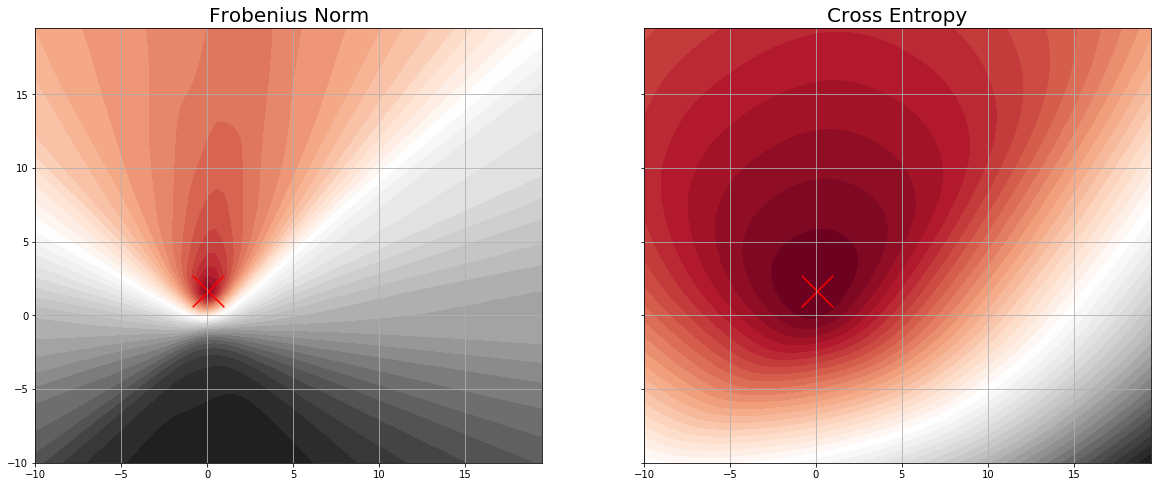

In [70]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(20)
axs[0].contourf(X, Y, outputLSTSQ, 50, cmap='RdGy')
axs[1].contourf(X, Y, outputCE, 50, cmap='RdGy')
axs[0].scatter(B_true[0], B_true[1], marker='x', c='red', s=1000)
axs[1].scatter(B_true[0], B_true[1], marker='x', c='red', s=1000)
axs[1].set_title('Cross Entropy', size=20)
axs[0].set_title('Frobenius Norm', size=20)
axs[0].grid()
axs[1].grid()

One is non-convex, one is convex. That's all the reason you need to go with Cross-Entropy. 